<a href="https://colab.research.google.com/github/Sourav1429/Machine_Unlearning/blob/main/MuLtC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using SVM

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
folder_path = "/content/drive/MyDrive/mnist_train.csv"
or_data = pd.read_csv(folder_path);
or_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
number_of_indexes_to_forget = 150
forget_indices = np.random.choice(len(or_data),number_of_indexes_to_forget)
#print(forget_indices)

In [ ]:
X_or = or_data.drop(['label'],axis=1).to_numpy()
y_or = or_data['label'].to_numpy()
print(X_or[:5])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
clf = svm.SVC()
clf.fit(X_or,y_or)

SVC()

In [ ]:
y_predict = clf.predict(X_or)
print('Training accuracy',accuracy_score(y_or,y_predict))

Training accuracy 0.9899166666666667


In [ ]:
test_path = "/content/drive/MyDrive/mnist_test.csv"
test_data = pd.read_csv(folder_path);
test_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test_or = test_data.drop(['label'],axis=1).to_numpy()
y_test_or = test_data['label'].to_numpy()
print(X_test_or[:5])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
#After we remove the forget indices data
rm_data = or_data.drop(forget_indices)
X_f = rm_data.drop(['label'],axis=1).to_numpy()
y_f = rm_data['label'].to_numpy()
clf.fit(X_f,y_f)
y_predict = clf.predict(X_test_or)
print(accuracy_score(y_test_or,y_predict))

0.98985


In [ ]:
values = np.random.choice(number_of_indexes_to_forget,10)
for i in values:
    print('Sample number:',i,'True label:',y_or[i])
    print('Predicted label:',clf.predict([X_or[i]]))

Sample number: 96 True label: 7
Predicted label: [7]
Sample number: 81 True label: 0
Predicted label: [0]
Sample number: 57 True label: 9
Predicted label: [9]
Sample number: 10 True label: 3
Predicted label: [3]
Sample number: 96 True label: 7
Predicted label: [7]
Sample number: 113 True label: 1
Predicted label: [1]
Sample number: 12 True label: 3
Predicted label: [3]
Sample number: 37 True label: 0
Predicted label: [0]
Sample number: 35 True label: 5
Predicted label: [5]
Sample number: 118 True label: 0
Predicted label: [0]


In [ ]:
classes = np.unique(or_data['label'])
to_be_appended=[]
y_appended = []
y_add = y_or.copy()
oc_data = or_data['label'].copy().to_numpy()
for i in range(number_of_indexes_to_forget):
  oc_i = oc_data[forget_indices[i]]
  #print(oc_i)
  for j in range(len(classes)):
    if(oc_i==j):
      continue;
    df = np.copy(X_or[forget_indices[i]])
    #print(df)
    df[-1] = j
    #print(df)
    new = np.copy(df)
    #print(new)
    to_be_appended.append(new)
    y_add = np.append(y_add,j)
X_append = np.array(to_be_appended)
X_add = np.append(X_or,X_append,axis=0)
print(len(y_add),len(X_add))

61350 61350


In [ ]:
clf.fit(X_add,y_add)
y_predict = clf.predict(X_test_or)
print(accuracy_score(y_test_or,y_predict))

0.9902666666666666


In [ ]:
values = np.random.choice(number_of_indexes_to_forget,10)
for i in values:
    print('Sample number:',i,'True label:',y_or[i])
    print('Predicted label:',clf.predict([X_or[i]]))

Sample number: 42 True label: 7
Predicted label: [7]
Sample number: 5 True label: 2
Predicted label: [2]
Sample number: 55 True label: 8
Predicted label: [8]
Sample number: 82 True label: 2
Predicted label: [2]
Sample number: 6 True label: 1
Predicted label: [1]
Sample number: 104 True label: 1
Predicted label: [1]
Sample number: 119 True label: 0
Predicted label: [0]
Sample number: 86 True label: 3
Predicted label: [3]
Sample number: 80 True label: 9
Predicted label: [0]
Sample number: 53 True label: 4
Predicted label: [4]


This sample is 9 but predicted 0


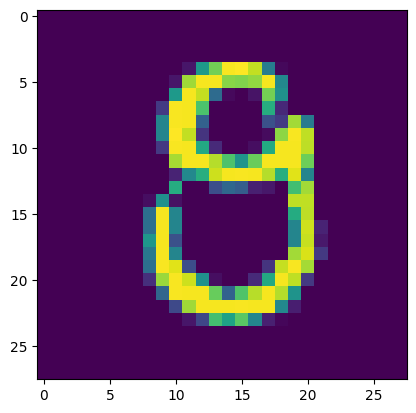

In [ ]:
plt.imshow(np.reshape(X_or[80],(28,28)))
print("This sample is 9 but predicted 0")

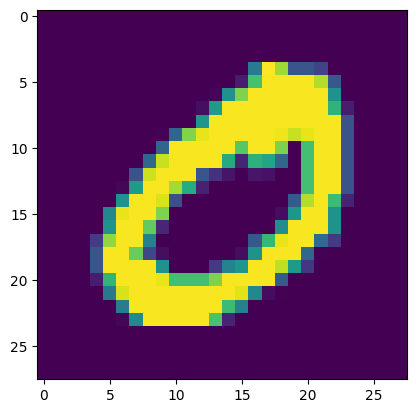

In [ ]:
plt.imshow(np.reshape(X_or[119],(28,28)))

#Using Decision Trees

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
folder_path = "/content/drive/MyDrive/mnist_train.csv"
or_data = pd.read_csv(folder_path);
or_data.head()

Mounted at /content/drive


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
number_of_indexes_to_forget = 1500
forget_indices = np.random.choice(len(or_data),number_of_indexes_to_forget)
#print(forget_indices)
X_or = or_data.drop(['label'],axis=1).to_numpy()
y_or = or_data['label'].to_numpy()
print(X_or[:5])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [4]:
clf = DecisionTreeClassifier()
clf.fit(X_or,y_or)
y_predict = clf.predict(X_or)
print('Training accuracy',accuracy_score(y_or,y_predict))

Training accuracy 1.0


In [5]:
test_path = "/content/drive/MyDrive/mnist_test.csv"
test_data = pd.read_csv(folder_path);
#test_data.head()
X_test_or = test_data.drop(['label'],axis=1).to_numpy()
y_test_or = test_data['label'].to_numpy()
print(X_test_or[:5])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [11]:
#After we remove the forget indices data
rm_data = or_data.drop(forget_indices)
X_f = rm_data.drop(['label'],axis=1).to_numpy()
y_f = rm_data['label'].to_numpy()
clf.fit(X_f,y_f)
y_predict = clf.predict(X_test_or)
print(accuracy_score(y_test_or,y_predict))

0.99685


In [7]:
values = np.random.choice(number_of_indexes_to_forget,10)
for i in values:
    print('Sample number:',i,'True label:',y_or[i])
    print('Predicted label:',clf.predict([X_or[i]]))

Sample number: 477 True label: 2
Predicted label: [2]
Sample number: 193 True label: 7
Predicted label: [7]
Sample number: 171 True label: 2
Predicted label: [2]
Sample number: 201 True label: 1
Predicted label: [1]
Sample number: 593 True label: 1
Predicted label: [1]
Sample number: 1242 True label: 1
Predicted label: [1]
Sample number: 714 True label: 2
Predicted label: [2]
Sample number: 1395 True label: 2
Predicted label: [2]
Sample number: 1062 True label: 5
Predicted label: [5]
Sample number: 1344 True label: 8
Predicted label: [8]


In [8]:
classes = np.unique(or_data['label'])
to_be_appended=[]
y_appended = []
y_add = y_or.copy()
oc_data = or_data['label'].copy().to_numpy()
for i in range(number_of_indexes_to_forget):
  oc_i = oc_data[forget_indices[i]]
  #print(oc_i)
  for j in range(len(classes)):
    if(oc_i==j):
      continue;
    df = np.copy(X_or[forget_indices[i]])
    #print(df)
    df[-1] = j
    #print(df)
    new = np.copy(df)
    #print(new)
    to_be_appended.append(new)
    y_add = np.append(y_add,j)
X_append = np.array(to_be_appended)
X_add = np.append(X_or,X_append,axis=0)
print(len(y_add),len(X_add))
clf.fit(X_add,y_add)
y_predict = clf.predict(X_test_or)
print(accuracy_score(y_test_or,y_predict))

73500 73500
0.9778833333333333


In [29]:
values = np.random.choice(number_of_indexes_to_forget,50)
to_b_dis=[]
for i in values:
    pr = clf.predict([X_or[i]])[0]
    print('Sample number:',i,'True label:',y_or[i])
    print('Predicted label:',pr)
    if(y_or[i]!=pr):
      to_b_dis.append(i)

Sample number: 530 True label: 2
Predicted label: 2
Sample number: 1388 True label: 8
Predicted label: 8
Sample number: 253 True label: 2
Predicted label: 2
Sample number: 919 True label: 1
Predicted label: 1
Sample number: 1020 True label: 6
Predicted label: 6
Sample number: 720 True label: 8
Predicted label: 8
Sample number: 1315 True label: 3
Predicted label: 3
Sample number: 597 True label: 6
Predicted label: 6
Sample number: 1241 True label: 3
Predicted label: 3
Sample number: 1307 True label: 9
Predicted label: 9
Sample number: 45 True label: 9
Predicted label: 9
Sample number: 1452 True label: 1
Predicted label: 1
Sample number: 990 True label: 4
Predicted label: 4
Sample number: 761 True label: 8
Predicted label: 8
Sample number: 648 True label: 1
Predicted label: 1
Sample number: 751 True label: 5
Predicted label: 5
Sample number: 127 True label: 4
Predicted label: 4
Sample number: 593 True label: 1
Predicted label: 1
Sample number: 432 True label: 2
Predicted label: 2
Sample 

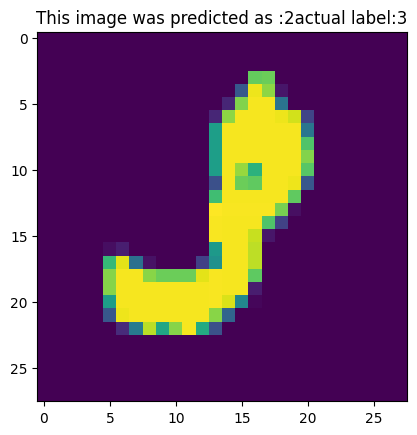

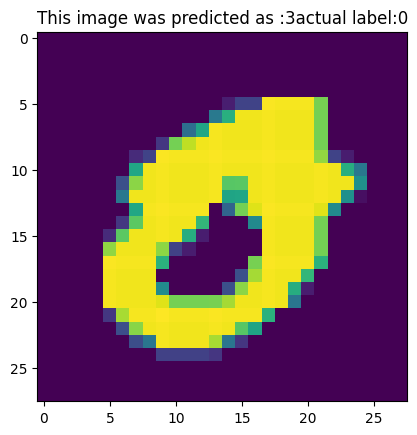

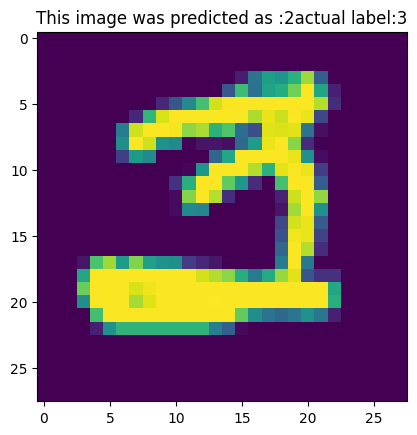

In [24]:
for i in to_b_dis:
  plt.figure()
  plt.imshow(np.resize(X_or[i],(28,28)))
  plt.title('This image was predicted as :'+str(clf.predict([X_or[i]])[0])+'actual label:'+str(y_or[i]))